### Detecting events

criterion: -5000, True Positives: 82, Predicted Positives: 131, Total Positives: 90
False Positives: 49, PPV: 0.6259541984732825, Accuracy: 0.6833333333333333
[[41 49]
 [ 8 82]]


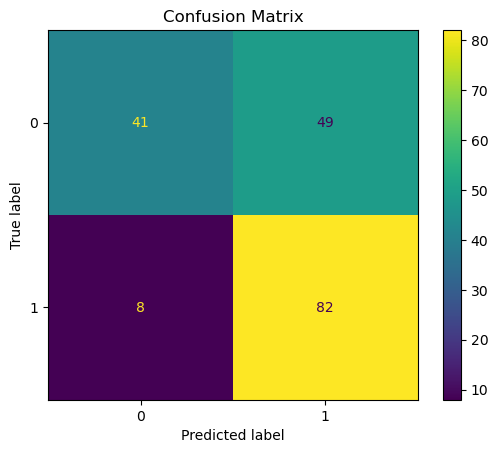

In [ ]:
#read hasQuake.txt and noQuake.txt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Load the data
hasQuake = np.loadtxt("Week5Data/hasQuake.txt", delimiter=",")
noQuake = np.loadtxt("Week5Data/noQuake.txt", delimiter=",")

criterion = -5000;

#select a range of thresholds
corrects = []
fps = []; 

# for each threshold, classify the data as noise or quake
trueCategory = []
predCategory = []

for i in range(len(hasQuake)):
    # if there are any values less than or equal to threshold, classify the data as noise 
    # if there are any values greater than threshold, classify the data as a quake
    trueCategory = np.append(trueCategory, 1)
    # check if any value in the row is greater than threshold
    if np.any(hasQuake[i] <= criterion):
        predCategory = np.append(predCategory, 1)
    else:
        predCategory = np.append(predCategory, 0)

for i in range(len(noQuake)):
    trueCategory = np.append(trueCategory, 0)
    # check if any value in the row is greater than threshold
    if np.any(noQuake[i] <= criterion):
        predCategory = np.append(predCategory, 1)
    else:
        predCategory = np.append(predCategory, 0)

# calculate proportion of correct classifications
# correct = true positives / total positives
# falsePositives = predicted positives - true positives

truePos = np.sum(predCategory[trueCategory == 1] == 1)
trueNeg = np.sum(predCategory[trueCategory == 0] == 0)
predPos = np.sum(predCategory == 1)
totalPos = np.sum(trueCategory == 1)
falsePos = (predPos-truePos)

ppv = truePos/(truePos+falsePos)
accuracy = (truePos + trueNeg)/(len(trueCategory))

print(f"criterion: {criterion}, True Positives: {truePos}, Predicted Positives: {predPos}, Total Positives: {totalPos}")
print(f"False Positives: {falsePos}, PPV: {ppv}, Accuracy: {accuracy}") #, True Positive Rate: {truePos/totalPos}, False Positive Rate: {falsePos/totalPos}")


# Determine the confusion matrix
cMat = confusion_matrix(trueCategory, predCategory)
print(cMat)
# Visualise the confusion matrix
ConfusionMatrixDisplay(cMat).plot()
plt.title("Confusion Matrix")
plt.show()



### ROC Curve

Threshold: -70000, True Positives: 8, Predicted Positives: 11, Total Positives: 90
Threshold: -69500, True Positives: 8, Predicted Positives: 11, Total Positives: 90
Threshold: -69000, True Positives: 8, Predicted Positives: 11, Total Positives: 90
Threshold: -68500, True Positives: 8, Predicted Positives: 11, Total Positives: 90
Threshold: -68000, True Positives: 8, Predicted Positives: 11, Total Positives: 90
Threshold: -67500, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -67000, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -66500, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -66000, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -65500, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -65000, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Threshold: -64500, True Positives: 9, Predicted Positives: 12, Total Positives: 90
Thre

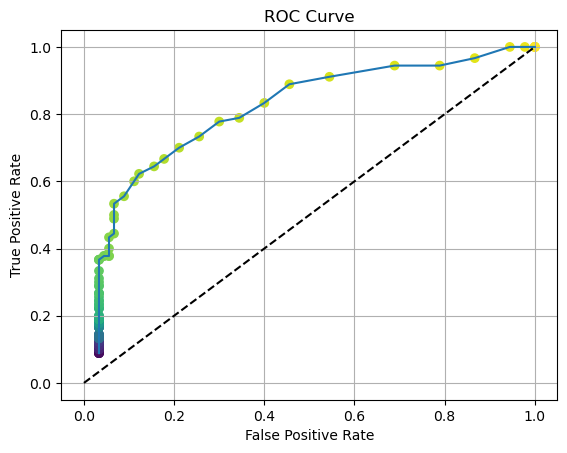

In [8]:
#read hasQuake.txt and noQuake.txt


threshold = -5000

#select a range of thresholds
thresholds = np.arange(-70000, 0, 500)
corrects = []
fps = []; 

# for each threshold, classify the data as noise or quake
for t in thresholds:
    trueCategory = []
    predCategory = []

    for i in range(len(hasQuake)):
        # if there are any values less than or equal to threshold, classify the data as noise 
        # if there are any values greater than threshold, classify the data as a quake
        trueCategory = np.append(trueCategory, 1)
        # check if any value in the row is greater than threshold
        if np.any(hasQuake[i] <= t):
            predCategory = np.append(predCategory, 1)
        else:
            predCategory = np.append(predCategory, 0)

    for i in range(len(noQuake)):
        trueCategory = np.append(trueCategory, 0)
        # check if any value in the row is greater than threshold
        if np.any(noQuake[i] <= t):
            predCategory = np.append(predCategory, 1)
        else:
            predCategory = np.append(predCategory, 0)

    # calculate proportion of correct classifications
    # correct = true positives / total positives
    # falsePositives = predicted positives - true positives

    # Classification for one criterion happens 

    truePos = np.sum(predCategory[trueCategory == 1] == 1)
    predPos = np.sum(predCategory == 1)
    totalPos = np.sum(trueCategory == 1)
    falsePos = (predPos-truePos)

    corrects = np.append(corrects, truePos/totalPos)
    fps = np.append(fps, falsePos/totalPos)
    print(f"Threshold: {t}, True Positives: {truePos}, Predicted Positives: {predPos}, Total Positives: {totalPos}")
    # print(f"Threshold: {t}, Correct Classification: {correct}")

# plot the proportion of correct classification at each threshold
plt.plot(fps, corrects, '-')
plt.scatter(fps, corrects, c=thresholds, cmap='viridis')
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()

